In [155]:
# validationf VeRITAS
# we validate how well veritas is doing when we cannot ask too many question
# Typically, we want to evaluate performance in conjunction with a CAT framework
# Conclusion: It seems CAT's question generation is not abest for Veritas
# we can ask similar number of questions, but get much better performance if we 
# generate the questiosn differently, namely questions that not only 
# take into account the goal of getting to diagnosis, but also detection of malingering

In [182]:
def selrandomq(jsondata,num):
    '''
    sel random num number of responses from a json
    '''
    from random import sample 
    subname=list(jsondata.keys())[0]
    keys=list(jsondata[subname].keys())
    return {subname: {k:jsondata[subname][k] for k in sample(keys,num)}}
#selrandomq(fulldata20[0],5)    

In [183]:
import sys
sys.path.append("../") 
from infer_veritas import  *
from truthfinder import *
import gzip

In [2]:
! pwd

/home/ishanu/ZED/Research/truthnet/veritas_test/ntb


In [3]:
with gzip.open('../response_jsons/validation_cat.pkl.gz', 'rb') as filepath:
    catadata = pickle.load(filepath)
with gzip.open('../response_jsons/validation_index20.pkl.gz', 'rb') as filepath:
    fulldata20 = pickle.load(filepath)
with gzip.open('../response_jsons/validation_ptsd_full.pkl.gz', 'rb') as filepath:
    fulldata = pickle.load(filepath)
Veritas_model_path='../veritas_models/veritas_001.pkl.gz'

In [184]:
with gzip.open('../response_jsons/validation_index20.pkl.gz', 'rb') as filepath:
    fulldatar_ = pickle.load(filepath)
num=12
fulldatarand=[selrandomq(i,num) for i in fulldatar_]

In [185]:
Rrnd=reveal(fulldatarand,Veritas_model_path,perturb=0)

ckeck passed


In [4]:
Rcat=reveal(catadata,Veritas_model_path,perturb=0)

ckeck passed


In [5]:
R=reveal(fulldata,Veritas_model_path,perturb=0)

ckeck passed


In [6]:
RcatP5=reveal(catadata,Veritas_model_path,perturb=5)

ckeck passed


In [7]:
R20=reveal(fulldata20,Veritas_model_path,perturb=0)

ckeck passed


In [8]:
RcatP10=reveal(catadata,Veritas_model_path,perturb=5)

ckeck passed


In [43]:
Rcat[0][5]

{'subject_id': 'CAT10061',
 'responses': {'ptsd156': '3',
  'ptsd148': '4',
  'ptsd210': '4',
  'ptsd160': '4',
  'ptsd187': '4',
  'ptsd188': '4',
  'ptsd189': '4',
  'ptsd155': '3',
  'ptsd145': '3',
  'ptsd153': '3',
  'ptsd169': '3',
  'ptsd18': '3',
  'ptsd184': '3',
  'ptsd77': '3'},
 'veritas': 0.6438095238095238,
 'score': 1.3893441416921837,
 'lower_threshold': 1.0057738724810028,
 'veritas_prob': 0.28310089932496163,
 'lower_prob': 0.3286226495484607}

In [186]:
pd.DataFrame().assign(cat=[i['score'] for i in Rcat[0]], cat5=[i['score'] for i in RcatP5[0]], 
                      r20=[i['score'] for i in R20[0]],
                      full= [i['score'] for i in R[0]],rrnd=[i['score'] for i in Rrnd[0]]).corr()

,cat,cat5,r20,full,rrnd
cat,1.000000,0.862653,0.757177,0.791940,0.784064
cat5,0.862653,1.000000,0.659112,0.691014,0.680677
r20,0.757177,0.659112,1.000000,0.935782,0.926869
full,0.791940,0.691014,0.935782,1.000000,0.893550
rrnd,0.784064,0.680677,0.926869,0.893550,1.000000


In [187]:
pd.DataFrame().assign(cat=[i['veritas'] for i in Rcat[0]], cat5=[i['veritas'] for i in RcatP5[0]], 
                      r20=[i['veritas'] for i in R20[0]],
                      full= [i['veritas'] for i in R[0]],rrnd=[i['veritas'] for i in Rrnd[0]]).corr()

,cat,cat5,r20,full,rrnd
cat,1.000000,0.736365,0.632128,0.687034,0.614216
cat5,0.736365,1.000000,0.471229,0.491666,0.430322
r20,0.632128,0.471229,1.000000,0.901674,0.919375
full,0.687034,0.491666,0.901674,1.000000,0.856520
rrnd,0.614216,0.430322,0.919375,0.856520,1.000000


In [188]:
pd.DataFrame().assign(cat=[i['lower_threshold'] for i in Rcat[0]], cat5=[i['lower_threshold'] for i in RcatP5[0]],
                      r20=[i['lower_threshold'] for i in R20[0]],
                      full= [i['lower_threshold'] for i in R[0]],rrnd=[i['lower_threshold'] for i in Rrnd[0]]).corr()

,cat,cat5,r20,full,rrnd
cat,1.000000,0.828158,0.407477,0.541270,0.474462
cat5,0.828158,1.000000,0.342750,0.427449,0.393214
r20,0.407477,0.342750,1.000000,0.715465,0.751639
full,0.541270,0.427449,0.715465,1.000000,0.712362
rrnd,0.474462,0.393214,0.751639,0.712362,1.000000


In [189]:
pd.DataFrame([(int(i['subject_id'][-1]),i['lower_threshold']) for i in Rcat[0]])#.corr()

,0,1
0,0,1.082355
1,0,1.421729
2,0,1.425484
3,0,1.621437
4,0,1.880801
...,...,...
299,1,1.676385
300,1,0.995974
301,0,1.128964
302,0,2.122038


In [220]:
def malingering(lower_threshold,veritas,upper,C0=1,C1=0.76,C2=1.35):
    M=False
    if (lower_threshold < C0) and (upper > C2):
        M=True
    if (veritas > C1) and (upper > C2):
        M=True
    return int(M)

In [221]:
Dcat=pd.DataFrame([(int(i['subject_id'][-1]),malingering(i['lower_threshold'],i['veritas'],i['score'])) for i in Rcat[0]],columns=['dx','mg'])
print(Dcat[(Dcat.dx==1) & (Dcat.mg==1)].index.size)
Dcat.corr()

27


,dx,mg
dx,1.000000,0.302082
mg,0.302082,1.000000


In [222]:
pd.DataFrame([(int(i['subject_id'][-1]),malingering(i['lower_threshold'],i['veritas'],i['score'])) for i in R20[0]]).corr()

,0,1
0,1.000000,0.085064
1,0.085064,1.000000


In [223]:
rf20=pd.DataFrame([(int(i['subject_id'][-1]),malingering(i['lower_threshold'],i['veritas'],i['score'])) for i in R20[0]],columns=['dx','mg'])
rf20.corr()

,dx,mg
dx,1.000000,0.085064
mg,0.085064,1.000000


In [224]:
rf20[rf20.dx==1].index.size

86

In [225]:
rf20[(rf20.dx==1) & (rf20.mg==1)]

,dx,mg
20,1,1
39,1,1


In [226]:
rf20[(rf20.mg==1)].index.size

3

In [227]:
rf=pd.DataFrame([(int(i['subject_id'][-1]),malingering(i['lower_threshold'],i['veritas'],i['score'])) for i in R[0]],columns=['dx','mg'])
rf.corr()

,dx,mg
dx,1.000000,0.244427
mg,0.244427,1.000000


In [228]:
rf[(rf.dx==1) & (rf.mg==1)]

,dx,mg
20,1,1
58,1,1
69,1,1
152,1,1
213,1,1
246,1,1
293,1,1


In [229]:
rf[(rf.mg==1)].index.size

7

In [230]:
rfcat=pd.DataFrame([(int(i['subject_id'][-1]),malingering(i['lower_threshold'],i['veritas'],i['score'])) for i in Rcat[0]],columns=['dx','mg'])
rfcat.corr()

,dx,mg
dx,1.000000,0.302082
mg,0.302082,1.000000


In [231]:
rfcat[(rfcat.dx==1) & (rfcat.mg==1)]

,dx,mg
18,1,1
39,1,1
57,1,1
63,1,1
76,1,1
85,1,1
86,1,1
88,1,1
90,1,1
97,1,1


In [232]:
rfcat[(rfcat.mg==1)].index.size

44

In [233]:
rfrnd=pd.DataFrame([(int(i['subject_id'][-1]),malingering(i['lower_threshold'],i['veritas'],i['score'])) for i in Rrnd[0]],
                   columns=['dx','mg'])
rfrnd.corr()

,dx,mg
dx,1.000000,0.113614
mg,0.113614,1.000000


In [234]:
rfrnd[(rfrnd.dx==1) & (rfrnd.mg==1)]

,dx,mg
8,1,1
39,1,1
58,1,1
88,1,1
106,1,1
127,1,1
188,1,1
252,1,1


In [235]:
rfrnd[(rfrnd.mg==1)].index.size

16

In [206]:
from sklearn import metrics
from zedstat import zedstat
from jupyterthemes import jtplot
import pylab as plt
jtplot.style()

In [241]:
fpr, tpr, thresholds = metrics.roc_curve(rf.dx.values,[1/(1+ (1/x['score'])) for x in R[0]], pos_label=1)
ff=pd.DataFrame(tpr,fpr,columns=['tpr']).assign(threshold=thresholds)
ff.index.name='fpr'
zt=zedstat.processRoc(df=ff.reset_index(),
                      order=3, 
                      total_samples=304,
                      positive_samples=86,
                      alpha=0.01,
                      prevalence=0.5)
zt.smooth(STEP=0.001)
zt.allmeasures(interpolate=True)
zt.usample(precision=3)

fpr20, tpr20, thresholds20 = metrics.roc_curve(rf.dx.values,[1/(1+ (1/x['score'])) for x in R20[0]], pos_label=1)
ff20=pd.DataFrame(tpr20,fpr20,columns=['tpr']).assign(threshold=thresholds20)
ff20.index.name='fpr'
zt20=zedstat.processRoc(df=ff20.reset_index(),
                      order=3, 
                      total_samples=304,
                      positive_samples=86,
                      alpha=0.01,
                      prevalence=0.5)
zt20.smooth(STEP=0.001)
zt20.allmeasures(interpolate=True)
zt20.usample(precision=3)

fprcat, tprcat, thresholdscat = metrics.roc_curve(rfcat.dx.values,[1/(1+ (1/x['score'])) for x in Rcat[0]], pos_label=1)
ffcat=pd.DataFrame(tprcat,fprcat,columns=['tpr']).assign(threshold=thresholdscat)
ffcat.index.name='fpr'
ztcat=zedstat.processRoc(df=ffcat.reset_index(),
                      order=3, 
                      total_samples=304,
                      positive_samples=86,
                      alpha=0.01,
                      prevalence=0.5)
ztcat.smooth(STEP=0.001)
ztcat.allmeasures(interpolate=True)
ztcat.usample(precision=3)

fprrnd, tprrnd, thresholdsrnd = metrics.roc_curve(rfrnd.dx.values,[1/(1+ (1/x['score'])) for x in Rrnd[0]], pos_label=1)
ffrnd=pd.DataFrame(tprrnd,fprrnd,columns=['tpr']).assign(threshold=thresholdsrnd)
ffrnd.index.name='fpr'
ztrnd=zedstat.processRoc(df=ffrnd.reset_index(),
                      order=3, 
                      total_samples=304,
                      positive_samples=86,
                      alpha=0.01,
                      prevalence=0.5)
ztrnd.smooth(STEP=0.001)
ztrnd.allmeasures(interpolate=True)
ztrnd.usample(precision=3)


CATTHETA=pd.read_csv('../response_jsons/cattheta304.csv',index_col=0).values
fprcat0, tprcat0, thresholdscat0 = metrics.roc_curve(rfcat.dx.values,CATTHETA, pos_label=1)
ffcat0=pd.DataFrame(tprcat0,fprcat0,columns=['tpr']).assign(threshold=thresholdscat0)
ffcat0.index.name='fpr'
ztcat0=zedstat.processRoc(df=ffcat0.reset_index(),
                      order=3, 
                      total_samples=304,
                      positive_samples=86,
                      alpha=0.01,
                      prevalence=0.5)
ztcat0.smooth(STEP=0.001)
ztcat0.allmeasures(interpolate=True)
ztcat0.usample(precision=3)

,tpr,ppv,acc,npv,LR+,LR-,threshold
fpr,,,,,,,
0.000,0.000000,0.911834,0.500000,0.500000,13.934402,1.000000,3.2880
0.001,0.013953,0.911413,0.506518,0.503521,14.061892,0.986843,3.1263
0.002,0.027907,0.910993,0.513036,0.507042,14.189382,0.973686,2.9646
0.003,0.041860,0.910573,0.519554,0.510562,14.316872,0.960530,2.8029
0.004,0.055814,0.910153,0.526072,0.514083,14.444362,0.947373,2.6412
...,...,...,...,...,...,...,...
0.996,1.000000,0.455627,0.501998,1.323023,1.005155,0.000000,0.0000
0.997,1.000000,0.455170,0.501498,1.324485,1.003866,0.000000,0.0000
0.998,1.000000,0.454712,0.500999,1.325947,1.002577,0.000000,0.0000


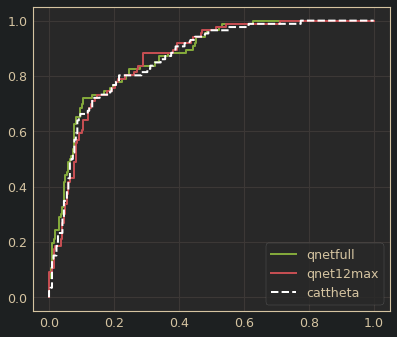

In [243]:
plt.plot(fpr,tpr,'g',lw=2)
plt.plot(fpr20,tpr20,'r',lw=2)
#plt.plot(fprcat,tprcat,'b',lw=2)
#plt.plot(fprrnd,tprrnd,'m',lw=1)
plt.plot(fprcat0,tprcat0,'--w',lw=2)
plt.gca().legend(['qnetfull','qnet12max','cattheta'])

rrnd:  (0.8601918604651162, 0.913788740161741, 0.8066810360061523) cat0:  (0.8738720930232557, 0.9321944097985972, 0.8156089531527262)
full:  (0.8836744186046512, 0.9371185426558697, 0.8302674818183453) r20:  (0.8781569767441861, 0.9314922823849526, 0.8248891542974541) rcat:  (0.8390697674418606, 0.9026818502071612, 0.7756098878227193) rrnd:  (0.8601918604651162, 0.913788740161741, 0.8066810360061523) cat0:  (0.8738720930232557, 0.9321944097985972, 0.8156089531527262)


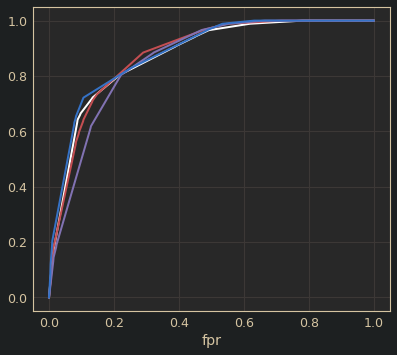

In [245]:
ztcat0.get().tpr.plot(style='-w',lw=2)
zt20.get().tpr.plot(style='-r',lw=2)
ztrnd.get().tpr.plot(style='-m',lw=2)
zt.get().tpr.plot(style='-b',lw=2)
#ztcat.get().tpr.plot(style='-b',lw=2)
print('rrnd: ',ztrnd.auc(), 'cat0: ',ztcat0.auc())
print('full: ',zt.auc(),'r20: ',zt20.auc(), 'rcat: ',ztcat.auc(), 'rrnd: ',ztrnd.auc(), 'cat0: ',ztcat0.auc())


In [209]:
zt.scoretoprobability(1.3)

0.8596907679476486

In [210]:
zt20.scoretoprobability(1.3)

0.9147421701993039

In [211]:
ztrnd.scoretoprobability(1.3)

0.8409785932721713

In [212]:
! pwd

/home/ishanu/ZED/Research/truthnet/veritas_test/ntb


In [253]:
a=ztcat0.get()
a[a.ppv>.9].tail(1)

,tpr,ppv,acc,npv,LR+,LR-,threshold
fpr,,,,,,,
0.025,0.240801,0.900397,0.607916,0.572008,13.615078,0.772523,1.424519


In [256]:
np.array([x[0] for x in CATTHETA]).min(),np.array([x[0] for x in CATTHETA]).max()

(-2.769, 2.288)

In [248]:
ffcat0

,tpr,threshold
fpr,,
0.000000,0.000000,3.288
0.000000,0.011628,2.288
0.000000,0.023256,2.222
0.004587,0.023256,1.777
0.004587,0.034884,1.689
...,...,...
0.876147,1.000000,-1.998
0.885321,1.000000,-2.001
0.935780,1.000000,-2.253


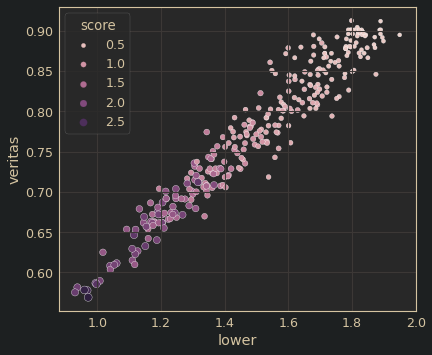

In [283]:
xxf=pd.DataFrame([(i['subject_id'],i['veritas'],i['lower_threshold'],i['score']) for i in R[0]],columns=['subid','veritas','lower','score']).set_index('subid')
import seaborn as sns
ax=sns.scatterplot(y=xxf.veritas,x=xxf.lower,hue=xxf.score, size=xxf.score)


In [289]:
xxf[(xxf.score>1.3)]

,veritas,lower,score
subid,,,
CAT10061,0.665835,1.222876,1.691094
CAT10091,0.672078,1.172834,1.553740
CAT10101,0.632686,1.150336,2.261280
CAT10151,0.615023,1.109787,1.958505
CAT10180,0.701357,1.342347,1.437264
...,...,...,...
CAT12921,0.629353,1.109207,2.146268
CAT12941,0.569054,0.970806,2.832594
CAT12950,0.720339,1.310023,1.796166


In [270]:
rf.mg.sum()

7

In [261]:
R20[0]

[{'subject_id': 'CAT10010',
  'responses': {'ptsd102': '2',
   'ptsd90': '3',
   'ptsd170': '2',
   'ptsd31': '2',
   'ptsd71': '2',
   'ptsd179': '2',
   'ptsd172': '2',
   'ptsd142': '2',
   'ptsd165': '3',
   'ptsd210': '4',
   'ptsd171': '3',
   'ptsd74': '2',
   'ptsd135': '2',
   'ptsd166': '2',
   'ptsd40': '2',
   'ptsd16': '4',
   'ptsd98': '1',
   'ptsd139': '3',
   'ptsd145': '3',
   'ptsd50': '3'},
  'veritas': 0.8124548736462094,
  'score': 0.7117694114985905,
  'lower_threshold': 1.6235465184346336,
  'veritas_prob': 0.9955589748411942,
  'lower_prob': 0.9998717827348964},
 {'subject_id': 'CAT10020',
  'responses': {'ptsd102': '3',
   'ptsd90': '4',
   'ptsd170': '3',
   'ptsd31': '2',
   'ptsd71': '3',
   'ptsd179': '2',
   'ptsd172': '2',
   'ptsd142': '2',
   'ptsd165': '3',
   'ptsd210': '4',
   'ptsd171': '1',
   'ptsd74': '4',
   'ptsd135': '2',
   'ptsd166': '3',
   'ptsd40': '2',
   'ptsd16': '3',
   'ptsd98': '3',
   'ptsd139': '2',
   'ptsd145': '2',
   'ptsd50'